# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, scale
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings(action='ignore')

# Dataset Processing

In [81]:
# data 불러오기
data = pd.read_csv('/Users/kangseunggu/Downloads/CrabAgePrediction.csv')
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [82]:
# data set의 대략적인 특징 파악
data.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [83]:
# null값과 variable의 data type 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [95]:
# dummy variable 생성 (Female=0, Intermediate=1, Male=0)

data['Gender'] = (data.Sex == "I").map({True:1, False:0})
df = data.drop(['Sex'], axis=1)
df.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Gender
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1


In [96]:
# predictor와 response 설정
x = df.drop(['Age'], axis=1)
y = df['Age']

In [97]:
# data spliting
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state=42)

# Multiple Regression

In [98]:
ols_sm = sm.OLS(y_train, sm.add_constant(x_train))
ols_sm_results = ols_sm.fit()
ols_sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     390.9
Date:                Sat, 21 May 2022   Prob (F-statistic):               0.00
Time:                        17:29:21   Log-Likelihood:                -6031.9
No. Observations:                2725   AIC:                         1.208e+04
Df Residuals:                    2716   BIC:                         1.214e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.1203      0.359     11.478      0.000       3.416       4.824
Length            -0.6944      0.891     -0.780      0.436      -2.441       1.052
Diameter           5.0624      1.095      4.624      0.000       2.916       7.209
Height             3.6926      0.680      5.431      0.000       2.359       5.026
Weight             0.2393      0.031      7.722      0.000       0.179       0.300
Shucked Weight    -0.6314      0.035    -18.061      0.000      -0.700      -0.563
Viscera Weight    -0.2891      0.057     -5.109      0.000      -0.400      -0.178
Shell Weight       0.4185      0.049      8.541      0.000       0.322       0.515
Gender            -0.8956      0.112     -7.995      0.000      -1.115      -0.676
==============================================================================
Omnibus:                      544.245   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1358.202
Skew:                           1.086   Prob(JB):                    1.18e-295
Kurtosis:                       5.691   Cond. No.                     1.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

Text(0, 0.5, 'Predicted Age')

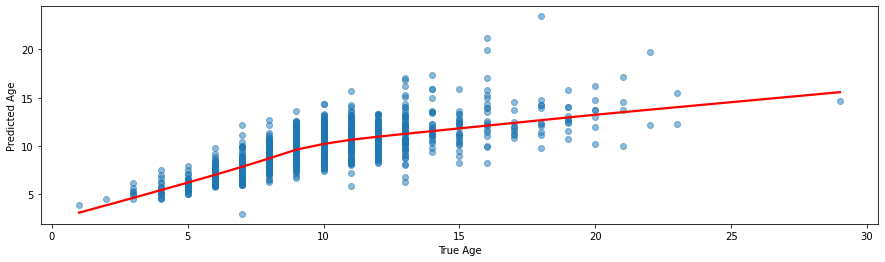

In [100]:
fig = plt.figure(figsize=(15,4))
sns.regplot(x=y_test, y=lr.predict(x_test), 
            scatter_kws={'alpha':0.5},
            line_kws={'color': 'red'},
            lowess=True)
plt.xlabel('True Age')
plt.ylabel('Predicted Age')

In [101]:
multi_MSE = mean_squared_error(y_test, lr.predict(x_test)) # y_true, y_pred error
multi_MSE

4.636375889472515

## Polynomial Regression (degree=2)

In [102]:
poly = PolynomialFeatures(2)
poly_fit = poly.fit_transform(df)

In [103]:
df_poly = pd.DataFrame(poly_fit, columns = poly.get_feature_names(df.columns))
df_poly = df_poly.drop(columns=['1'], axis=1)
df_poly

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Gender,Length^2,...,Viscera Weight^2,Viscera Weight Shell Weight,Viscera Weight Age,Viscera Weight Gender,Shell Weight^2,Shell Weight Age,Shell Weight Gender,Age^2,Age Gender,Gender^2
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9.0,0.0,2.066406,...,31.190566,37.682004,50.263663,0.000000,45.524451,60.724629,0.000000,81.0,0.0,0.0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6.0,0.0,0.787656,...,1.890490,2.143854,8.249704,0.000000,2.431175,9.355335,0.000000,36.0,0.0,0.0
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6.0,1.0,1.076406,...,2.565593,4.427350,9.610480,1.601747,7.640118,16.584457,2.764076,36.0,6.0,1.0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10.0,0.0,1.380625,...,5.208139,11.969015,22.821348,0.000000,27.506432,52.446575,0.000000,100.0,0.0,0.0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6.0,1.0,0.787656,...,2.215182,2.531637,8.930093,1.488349,2.893299,10.205820,1.700970,36.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8.0,0.0,2.138906,...,34.271327,37.341639,46.833374,0.000000,40.687016,51.029100,0.000000,64.0,0.0,0.0
3889,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10.0,0.0,2.402500,...,51.443659,70.150444,71.724235,0.000000,95.659696,97.805775,0.000000,100.0,0.0,0.0
3890,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5.0,1.0,0.390625,...,0.275064,0.334538,2.622329,0.524466,0.406870,3.189319,0.637864,25.0,5.0,1.0
3891,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6.0,1.0,1.128906,...,5.470143,6.962001,14.033003,2.338834,8.860728,17.860185,2.976698,36.0,6.0,1.0


In [104]:
x_poly = df_poly.drop(['Age'], axis=1)
y_poly = df_poly['Age']
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x_poly, y_poly, train_size = 0.8, test_size = 0.2, random_state=42)

In [105]:
lr.fit(x_train_poly, y_train_poly)

LinearRegression()

In [106]:
ols_sm = sm.OLS(y_train_poly, sm.add_constant(x_train_poly))
ols_sm_results = ols_sm.fit()
ols_sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.808e+04
Date:                Sat, 21 May 2022   Prob (F-statistic):               0.00
Time:                        17:29:40   Log-Likelihood:                 834.94
No. Observations:                3114   AIC:                            -1564.
Df Residuals:                    3061   BIC:                            -1244.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             2.8979      0.146     19.856      0.000       2.612       3.184
Length                           -2.5664      0.687     -3.735      0.000      -3.914      -1.219
Diameter                          5.2944      0.847      6.248      0.000       3.633       6.956
Height                            3.4952      0.874      3.998      0.000       1.781       5.209
Weight                            0.2297      0.031      7.479      0.000       0.169       0.290
Shucked Weight                   -0.5487      0.035    -15.826      0.000      -0.617      -0.481
Viscera Weight                   -0.1293      0.066     -1.968      0.049      -0.258      -0.000
Shell Weight                      0.3330      0.049      6.746      0.000       0.236       0.430
Gender                           -0.5882      0.043    -13.594      0.000      -0.673      -0.503
Length^2                         -1.5659      0.394     -3.972      0.000      -2.339      -0.793
Length Diameter                   0.8698      1.010      0.861      0.389      -1.111       2.851
Length Height                    -3.1203      2.050     -1.522      0.128      -7.139       0.899
Length Weight                    -0.1050      0.055     -1.915      0.056      -0.212       0.003
Length Shucked Weight             0.3777      0.065      5.854      0.000       0.251       0.504
Length Viscera Weight            -0.0023      0.095     -0.024      0.981      -0.188       0.184
Length Shell Weight              -0.3036      0.084     -3.625      0.000      -0.468      -0.139
Length Age                        0.7435      0.030     24.454      0.000       0.684       0.803
Length Gender                     0.9231      0.210      4.394      0.000       0.511       1.335
Diameter^2                       -3.8738      0.943     -4.106      0.000      -5.724      -2.024
Diameter Height                  -4.3349      2.485     -1.745      0.081      -9.207       0.537
Diameter Weight                  -0.0003      0.067     -0.004      0.997      -0.131       0.130
Diameter Shucked Weight           0.1002      0.080      1.258      0.208      -0.056       0.256
Diameter Viscera Weight           0.1907      0.117      1.628      0.104      -0.039       0.420
Diameter Shell Weight             0.0436      0.099      0.441      0.660      -0.151       0.238
Diameter Age                      0.0988      0.041      2.395      0.017       0.018       0.180
Diameter Gender                  -0.4427      0.256     -1.729      0.084      -0.945       0.059
Height^2                         -0.2685      0.099     -2.711      0.007      -0.463      -0.074
Height Weight                    -0.2229      0.059     -3.755      0.000      -0.339      -0.106
Height Shucked Weight             0.4076     

Text(0, 0.5, 'Predicted Age')

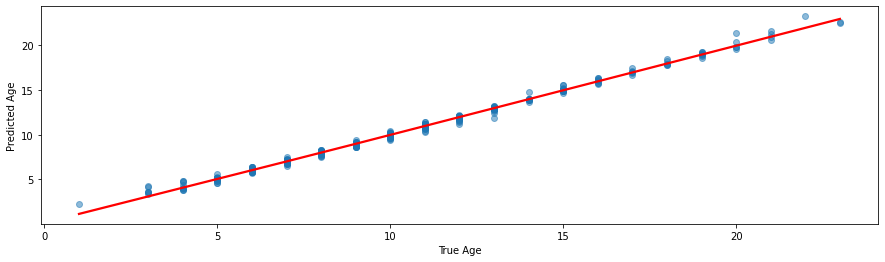

In [107]:
fig = plt.figure(figsize=(15,4))
sns.regplot(x=y_test_poly, y=lr.predict(x_test_poly), 
            scatter_kws={'alpha':0.5},
            line_kws={'color': 'red'},
            lowess=True)
plt.xlabel('True Age')
plt.ylabel('Predicted Age')

In [108]:
poly_MSE = mean_squared_error(y_test_poly, lr.predict(x_test_poly)) # y_true, y_pred error
poly_MSE

0.03930099194986923

## K-fold

In [109]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [110]:
kf_MSE_list = []
    
for train_index, test_index in kfold.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    kf = LinearRegression(fit_intercept=True)
    kf.fit(x_train, y_train)
    kf_MSE = mean_squared_error(y_test,kf.predict(x_test))
    kf_MSE_list.append(kf_MSE)

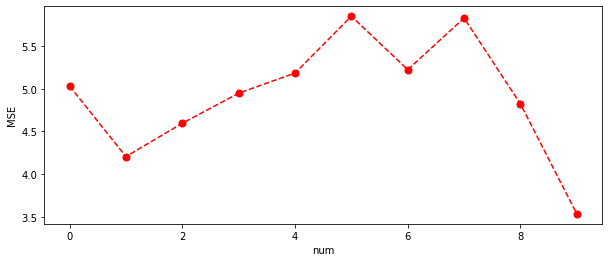

In [111]:
fig = plt.figure(figsize=(10,4))
plt.plot(kf_MSE_list, c = 'red', linestyle = '--', marker = 'o', markersize = 7)
plt.xlabel('num')
plt.ylabel('MSE')
plt.show()

In [112]:
kf_MSE = np.mean(kf_MSE_list)
kf_MSE

4.922211747212089

## Lasso

In [113]:
alpha = 10 ** np.linspace(1, -3, 100)

In [114]:
lasso_mse_list = []
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state=42)

for i in alpha:  
  lasso = Lasso(alpha = i)
  lasso.fit(x_train, y_train)
  lasso_MSE = mean_squared_error(y_test, lasso.predict(x_test))
  lasso_mse_list.append(lasso_MSE)

Text(0, 0.5, 'MSE')

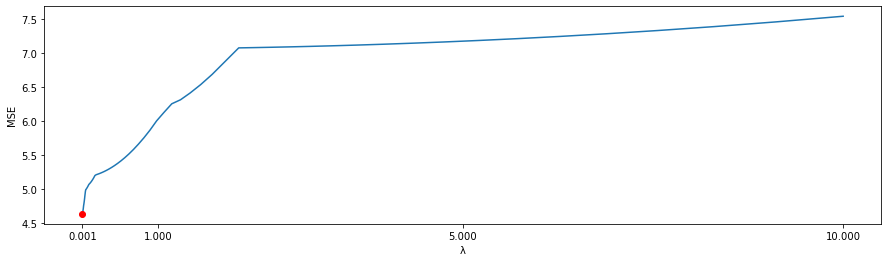

In [115]:
m = min(lasso_mse_list)

fig = plt.figure(figsize=(15,4))
plt.plot(alpha, lasso_mse_list)
plt.plot(lasso_mse_list[::-1].index(m), m, 'or')
plt.xticks([10**(-3), 1, 5, 10])
plt.xlabel('λ')
plt.ylabel('MSE')

In [116]:
lasso_cv = LassoCV(alphas=alpha, normalize=True, max_iter=1000)
lasso_cv.fit(x_train, y_train)
lasso_cv.alpha_

0.001

In [117]:
lasso = Lasso(alpha=lasso_cv.alpha_, normalize=True)
lasso_fit = lasso.fit(x_train, y_train)

pd.Series(lasso_fit.coef_, index = x.columns)

Length            0.000000
Diameter          3.088959
Height            3.363224
Weight            0.000000
Shucked Weight   -0.327673
Viscera Weight   -0.000000
Shell Weight      0.654297
Gender           -0.852253
dtype: float64

In [118]:
lasso_MSE = mean_squared_error(y_test,lasso_cv.predict(x_test))
lasso_MSE

4.980484823754432

## Compare MSE

In [119]:
x_axis = ['Multi Regression', 'Polynomial Regression', 'K-fold', 'Lasso']
y_axis = [multi_MSE, poly_MSE, kf_MSE, lasso_MSE]

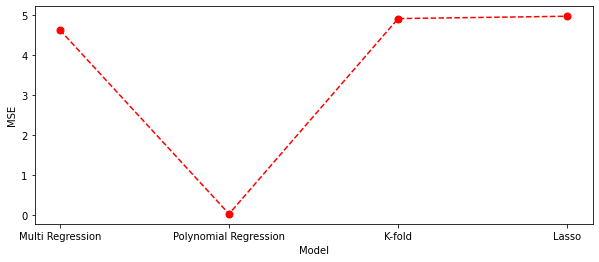

In [120]:
fig = plt.figure(figsize=(10,4))
plt.plot(x_axis, y_axis, c = 'red', linestyle = '--', marker = 'o', markersize = 7)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.show()